In [15]:
import numpy as np
import os
import pandas as pd
import torch

In [10]:
from sklearn.metrics import brier_score_loss

testy = [0 for x in range(100)] + [1 for x in range(10)]
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

losses = [brier_score_loss(testy, [y for x in range(len(testy))]) for y in predictions]
print(losses)

[0.09090909090909091, 0.08272727272727276, 0.0945454545454546, 0.12636363636363637, 0.1781818181818182, 0.25, 0.34181818181818163, 0.45363636363636384, 0.585454545454546, 0.7372727272727279, 0.9090909090909091]


In [19]:
2-np.array([0.1] * 10)  / np.array([0.2]* 10)

array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5])

In [2]:
os.getcwd()

'/home/grads/g/guangzhou92/Research/decoupling_imbalance/flexible_ehr_mimic/flexible-ehr'

In [3]:
os.chdir('/home/grads/g/guangzhou92/Research/decoupling_imbalance/flexible_ehr_mimic/flexible-ehr/data/root/numpy')
!ls

0-test.csv   3-test.csv   48-3-20.npy  48-7.npy     5-train.csv  8-train.csv
0-train.csv  3-train.csv  48-3.npy     48-8-20.npy  5-valid.csv  8-valid.csv
0-valid.csv  3-valid.csv  48-4-20.npy  48-8.npy     6-test.csv	 9-test.csv
1-test.csv   48-0-20.npy  48-4.npy     48-9-20.npy  6-train.csv  9-train.csv
1-train.csv  48-0.npy	  48-5-20.npy  48-9.npy     6-valid.csv  9-valid.csv
1-valid.csv  48-1-20.npy  48-5.npy     4-test.csv   7-test.csv
2-test.csv   48-1.npy	  48-6-20.npy  4-train.csv  7-train.csv
2-train.csv  48-2-20.npy  48-6.npy     4-valid.csv  7-valid.csv
2-valid.csv  48-2.npy	  48-7-20.npy  5-test.csv   8-test.csv


In [4]:
d = np.load('48-0.npy', allow_pickle=True).item()

In [5]:
P = []
n_bins = 20
for key, subdict in d.items():
    if len(subdict['cont']) > 0:
        P += [np.percentile(subdict['cont'], np.arange(0, 100 + (100 // n_bins), 100 // n_bins))]
P = dict(zip(d.keys(), P))

In [9]:
train_0 = pd.read_csv('0-train.csv')
train_0

,Unnamed: 0,Paths,Mortality,LOS
0,0,30065/episode1_timeseries_48.csv,0,14.0105
1,1,498/episode1_timeseries_48.csv,0,2.0893
2,2,21546/episode1_timeseries_48.csv,1,5.1954
3,3,45339/episode2_timeseries_48.csv,0,2.3560
4,4,75994/episode1_timeseries_48.csv,0,3.7267
...,...,...,...,...
18023,18023,55557/episode1_timeseries_48.csv,1,4.2103
18024,18024,23038/episode2_timeseries_48.csv,0,6.6886
18025,18025,16136/episode1_timeseries_48.csv,0,2.0505
18026,18026,56045/episode1_timeseries_48.csv,0,7.9017


In [18]:
c

0.13229420900820946

In [10]:
test_0 = pd.read_csv('0-test.csv')
test_0

,Unnamed: 0,Paths,Mortality,LOS
0,0,19763/episode1_timeseries_48.csv,0,5.0500
1,1,55966/episode1_timeseries_48.csv,0,12.1966
2,2,32768/episode1_timeseries_48.csv,0,6.1433
3,3,70784/episode1_timeseries_48.csv,0,2.2419
4,4,87361/episode1_timeseries_48.csv,0,2.0412
...,...,...,...,...
2110,2110,16976/episode3_timeseries_48.csv,0,8.3988
2111,2111,51658/episode1_timeseries_48.csv,1,9.5068
2112,2112,3100/episode4_timeseries_48.csv,0,4.1055
2113,2113,7614/episode2_timeseries_48.csv,0,12.4995


In [19]:
len(np.where(test_0['Mortality']==1)[0])/len(test_0)

0.13238770685579196

In [11]:
valid_0 = pd.read_csv('0-valid.csv')
valid_0

,Unnamed: 0,Paths,Mortality,LOS
0,0,12243/episode1_timeseries_48.csv,0,3.8815
1,1,31247/episode1_timeseries_48.csv,0,3.8669
2,2,21479/episode1_timeseries_48.csv,1,6.1002
3,3,29540/episode1_timeseries_48.csv,0,2.2125
4,4,57168/episode1_timeseries_48.csv,0,2.0592
...,...,...,...,...
995,995,71929/episode1_timeseries_48.csv,0,2.1389
996,996,9027/episode1_timeseries_48.csv,0,2.0801
997,997,9821/episode1_timeseries_48.csv,0,11.0825
998,998,28568/episode1_timeseries_48.csv,0,4.0039


In [20]:
len(np.where(valid_0['Mortality']==1)[0])/len(valid_0)

0.132

In [190]:
os.chdir('/home/grads/g/guangzhou92/Research/decoupling_imbalance/flexible_ehr_mimic/flexible-ehr/data/root/21546')
!ls | tail -100

episode1.csv
episode1_timeseries_48-3.csv
episode1_timeseries_48-4.csv
episode1_timeseries_48.csv
episode1_timeseries.csv
events.csv
stays.csv


In [191]:
ts = pd.read_csv('episode1_timeseries_48.csv')
ts

,Hours,VALUE,ITEMID_UOM,TOKEN_20
0,1.356667,9.5,"('1522', 'mg/dl')","('1522', 'mg/dl'): 19"
1,1.356667,9.5,"('50893', 'mg/dL')","('50893', 'mg/dL'): 19"
2,1.356667,9.5,"('786', 'mg/dl')","('786', 'mg/dl'): 19"
3,2.123333,MED,"('919', 'nan')","('919', 'nan'): MED"
4,2.123333,NaN,"('916', 'nan')","('916', 'nan'): nan"
...,...,...,...,...
2041,47.890000,None,"('159', 'nan')","('159', 'nan'): None"
2042,47.890000,Do Not Resuscita,"('128', 'nan')","('128', 'nan'): Do Not Resuscita"
2043,47.890000,133,"('455', 'mmHg')","('455', 'mmHg'): 15"
2044,47.890000,90,"('5820', '%')","('5820', '%'): 12"


In [187]:
os.chdir('/home/grads/g/guangzhou92/Research/decoupling_imbalance/flexible_ehr_mimic/flexible-ehr/data/root/45339')
!ls | tail -100

episode1.csv
episode1_timeseries_48-0.csv
episode1_timeseries_48.csv
episode1_timeseries.csv
episode2.csv
episode2_timeseries_48-2.csv
episode2_timeseries_48.csv
episode2_timeseries.csv
events.csv
stays.csv


In [188]:
ts = pd.read_csv('episode2_timeseries_48.csv')
ts

,Hours,VALUE,ITEMID_UOM,TOKEN_20
0,1.504167,Hypertension,"('225811', 'nan')","('225811', 'nan'): Hypertension"
1,1.504167,GI Bleed,"('225059', 'nan')","('225059', 'nan'): GI Bleed"
2,1.504167,Anemia,"('225059', 'nan')","('225059', 'nan'): Anemia"
3,1.504167,1,"('227688', 'nan')","('227688', 'nan'): 1"
4,1.604167,24,"('50882', 'mEq/L')","('50882', 'mEq/L'): 11"
...,...,...,...,...
2149,47.737500,1,"('226116', 'nan')","('226116', 'nan'): 1"
2150,47.737500,0,"('226138', 'nan')","('226138', 'nan'): 0"
2151,47.737500,0,"('228100', 'nan')","('228100', 'nan'): 0"
2152,47.737500,Dry,"('224860', 'nan')","('224860', 'nan'): Dry"


In [189]:
ts['TOKEN_20'].to_list()

["('225811', 'nan'): Hypertension",
 "('225059', 'nan'): GI Bleed",
 "('225059', 'nan'): Anemia",
 "('227688', 'nan'): 1",
 "('50882', 'mEq/L'): 11",
 "('51222', 'g/dL'): 2",
 "('50893', 'mg/dL'): 1",
 "('50902', 'mEq/L'): 12",
 "('50912', 'mg/dL'): 7",
 "('50960', 'mg/dL'): 6",
 "('50970', 'mg/dL'): 5",
 "('50971', 'mEq/L'): 4",
 "('50983', 'mEq/L'): 11",
 "('51006', 'mg/dL'): 14",
 "('51221', '%'): 2",
 "('50931', 'mg/dL'): 18",
 "('51248', 'pg'): 1",
 "('51249', '%'): 5",
 "('51250', 'fL'): 2",
 "('51265', 'K/uL'): 1",
 "('51277', '%'): 18",
 "('51279', 'm/uL'): 5",
 "('51301', 'K/uL'): 14",
 "('50868', 'mEq/L'): 7",
 "('50813', 'mmol/L'): 4",
 "('50817', '%'): 6",
 "('223796', 'nan'): None",
 "('223795', 'nan'): Patient Verbalized",
 "('223780', 'nan'): No/Not Sedated",
 "('223781', 'nan'): No",
 "('228096', 'nan'): -1 Awakens to voice (eye opening/contact) > 10 sec",
 "('227375', 'nan'): No",
 "('226732', 'nan'): None",
 "('227549', '%'): 0",
 "('223761', '?F'): 14",
 "('224650', 

In [179]:
row = ts.iloc[0]
if row['ITEMID_UOM'] in d:
    if row['ITEMID_UOM'] in P and float(row['VALUE']) in d[row['ITEMID_UOM']]['cont']:
        print('asjkdf')

asjkdf


In [178]:
float(row['VALUE'])

4.7

In [175]:
d[row['ITEMID_UOM']]['cont']

array([4.7, 6.4, 7.8, ..., 4.4, 3.8, 3.9])

In [169]:
for i in range(30):
    if ts['ITEMID_UOM'][i] in P:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [180]:
pd.read_csv('episode1_timeseries.csv').head(100)

,Hours,SUBJECT_ID,HADM_ID,ITEMID,VALUE,VALUEUOM
0,-3.063056,30065,186020,50810,31,%
1,-3.063056,30065,186020,50828,CONTROLLED,NaN
2,-3.063056,30065,186020,50824,136,mEq/L
3,-3.063056,30065,186020,50822,3.8,mEq/L
4,-3.063056,30065,186020,50821,447,mm Hg
...,...,...,...,...,...,...
95,2.070278,30065,186020,50818,42,mm Hg
96,2.070278,30065,186020,50820,7.40,units
97,2.070278,30065,186020,50821,335,mm Hg
98,2.070278,30065,186020,811,139,NaN


In [92]:
pd.read_csv('stays.csv')

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,LAST_CAREUNIT,INTIME,OUTTIME,LOS,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ETHNICITY,DIAGNOSIS,GENDER,DOB,DOD,AGE,MORTALITY_INUNIT,MORTALITY
0,30065,186020,243766,carevue,CSRU,2194-07-16 11:42:47,2194-07-30 11:57:54,14.0105,2194-07-16 08:00:00,2194-07-30 11:30:00,NaN,ELECTIVE,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,F,2113-02-21 00:00:00,2198-02-17 00:00:00,81.452055,0,0


In [93]:
pd.read_csv('events.csv')

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM
0,30065,186020,243766,2194-07-25 21:38:00,227464,3.5,mEq/L
1,30065,186020,243766,2194-07-26 02:43:00,220228,9.6,g/dl
2,30065,186020,243766,2194-07-26 02:43:00,220545,27.6,%
3,30065,186020,243766,2194-07-26 02:43:00,220546,11.9,K/uL
4,30065,186020,243766,2194-07-26 02:43:00,220602,105,mEq/L
...,...,...,...,...,...,...,...
27096,30065,186020,243766,2194-07-26 02:00:00,40055,145,ml
27097,30065,186020,243766,2194-07-19 07:00:00,40055,110,ml
27098,30065,186020,243766,2194-07-19 14:00:00,40055,17,ml
27099,30065,186020,243766,2194-07-17 22:00:00,40055,30,ml


In [143]:
np.percentile([10,  7,  4], np.arange(0, 100 + (100 // 20), 100 // 20))

array([ 4. ,  4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,
        7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ])

In [144]:
np.arange(0, 100 + (100 // 20), 100 // 20)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [3]:
import torch
X = torch.FloatTensor([[1, 2.3, 3], [4, 5.1, 6.3]])


In [6]:
T = X[:, 0]

In [8]:
T

tensor([1., 4.])

In [7]:
X = X[:, 1].long()

In [9]:
X

tensor([2, 5])

In [14]:
t_max = T.max()
t_max

tensor(4.)

In [12]:
T < t_max

tensor([ True, False])

In [15]:
t_max = T.max()
n = (T < t_max).sum(dim=0).max()

In [16]:
n

tensor(1)

In [18]:
T = T[:n]
X = X[:n]

In [19]:
T, X

(tensor([1.]), tensor([2]))

In [ ]:
((t <= T) & (T < t+1)).float().unsqueeze(2)

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

In [6]:
training_data = datasets.MNIST(root='../../../../Dataset/mnist')

In [8]:
loader = DataLoader(training_data)

In [9]:
loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../../../../Dataset/mnist
    Transforms (if any): None
    Target Transforms (if any): None

In [10]:
import numpy as np

In [12]:
np.unique([1,1,1,0, 0,0,0,0,0,0,0], return_counts=True)

(array([0, 1]), array([8, 3]))

In [13]:
import torch

In [40]:
torch.tensor([0.1,0.2,0.3]).shape

torch.Size([3])

In [29]:
a = torch.unsqueeze(torch.tensor([0.1,0.2,0.3]), dim=1)
a

tensor([[0.1000],
        [0.2000],
        [0.3000]])

In [30]:
b = 1-a
b

tensor([[0.9000],
        [0.8000],
        [0.7000]])

In [31]:
torch.cat((a, b), dim=1)

tensor([[0.1000, 0.9000],
        [0.2000, 0.8000],
        [0.3000, 0.7000]])

In [32]:
import torch

batch_size = 5
nb_digits = 10
# Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
y = torch.LongTensor(batch_size,1).random_() % nb_digits
# One hot encoding buffer that you create out of the loop and just keep reusing
y_onehot = torch.FloatTensor(batch_size, nb_digits)

# In your for loop
y_onehot.zero_()
y_onehot.scatter_(1, y, 1)

print(y)
print(y_onehot)

tensor([[7],
        [4],
        [8],
        [4],
        [4]])
tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])


In [36]:
src = torch.arange(1, 11).reshape((2, 5))
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [37]:
index = torch.tensor([[0, 1, 2, 0]])
index

tensor([[0, 1, 2, 0]])

In [39]:
torch.zeros(3, 5, dtype=src.dtype).scatter_(1, index, src)

tensor([[4, 2, 3, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [ ]:
self[index[i][j]][j] = src[i][j]  # if dim == 0
self[i][index[i][j]] = src[i][j]  # if dim == 1
index[0][1]=1

In [1]:
import torch

In [6]:
x = torch.Tensor([0.6, 0.3, 0.8])
target = torch.Tensor([0, 0, 1])

In [7]:
x = torch.unsqueeze(x, dim=1)
target = torch.unsqueeze(target, dim=1)
x = torch.cat((1 - x, x), dim=1)

index = torch.zeros_like(x, dtype=torch.uint8)
index.scatter_(1, target.data.view(-1, 1).long(), 1)

tensor([[1, 0],
        [1, 0],
        [0, 1]], dtype=torch.uint8)

In [8]:
x

tensor([[0.4000, 0.6000],
        [0.7000, 0.3000],
        [0.2000, 0.8000]])

In [19]:
import numpy as np
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

In [10]:
y_trues = np.load('./saved/y_trues_8.npy')

In [11]:
y_preds = np.load('./saved/y_preds_8.npy')

In [13]:
# calculate the brier skill score
def brier_skill_score(y, yhat, brier_ref):
    # calculate the brier score
    bs = brier_score_loss(y, yhat)
    # calculate skill score
    return 1.0 - (bs / brier_ref)

In [17]:
cls_num_list = np.unique(y_trues, return_counts=True)[1]
ratio = float(cls_num_list[1]) / np.sum(cls_num_list)
testy = y_trues

probabilities = [ratio for _ in range(len(testy))]
brier_ref = brier_score_loss(testy, probabilities)
print('Reference: Brier Score=%.4f' % (brier_ref))
# no skill prediction 0
probabilities = [0.0 for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('P(class1=0): BSS=%.4f' % (bss))
# no skill prediction 1
probabilities = [1.0 for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('P(class1=1): BSS=%.4f' % (bss))
# baseline probabilities
probabilities = [ratio for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('Baseline: BSS=%.4f' % (bss))
# perfect probabilities
bss = brier_skill_score(testy, testy, brier_ref)
print('Perfect: BSS=%.4f' % (bss))
# current probabilities
y_pred_sig = 1/(1 + np.exp(-y_preds))
bss = brier_skill_score(testy, y_pred_sig, brier_ref)
print('Current: BSS=%.4f' % (bss))

Reference: Brier Score=0.1146
P(class1=0): BSS=-0.1521
P(class1=1): BSS=-6.5758
Baseline: BSS=0.0000
Perfect: BSS=1.0000
Current: BSS=-1.1056


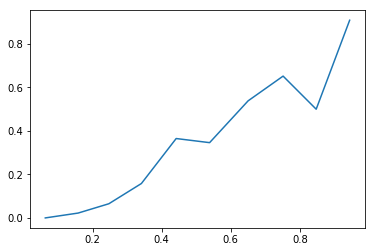

In [23]:
probabilities = [ratio for _ in range(len(testy))]
fraction_of_positives, mean_predicted_value = calibration_curve(y_trues, y_pred_sig, n_bins=10, normalize=True)
fig = pyplot.figure()
pyplot.plot(mean_predicted_value, fraction_of_positives)